In [3]:
# importing modules required for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from tabulate import tabulate
import warnings                                       # Remove unnecessary warnings for better interpretability 
warnings.filterwarnings('ignore')

In [390]:
traindata_df = pd.read_excel('train.xlsx')
testdata_df = pd.read_excel('test.xlsx')

In [391]:
traindata_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [392]:
testdata_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,...,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,...,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,...,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


In [393]:
traindata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [394]:
traindata_df = traindata_df.drop(['previous','profit','id'], axis = 1)
traindata_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,999.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,999.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,999.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,999.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,999.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no


In [395]:
testdata_df = testdata_df.drop(['previous','id'], axis = 1)
testdata_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,2,999,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,2,3,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,1,999,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,1,999,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0


In [396]:
# profit column had 2 rows at the end which had null values for all columns. Removing them
traindata_df = traindata_df.drop(index = traindata_df.index[-2:]) 

In [397]:
traindata_df.describe()

,custAge,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501
std,10.540516,2.709773,190.695054,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101
min,18.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000


In [398]:
traindata_df2 = traindata_df.copy()
x = traindata_df['custAge'].median()
traindata_df2['custAge'].fillna(x, inplace = True)
traindata_df=traindata_df2
traindata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         8238 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  poutcome        8238 non-null   object 
 13  emp.var.rate    8238 non-null   float64
 14  cons.price.idx  8238 non-null   float64
 15  cons.conf.idx   8238 non-null   float64
 16  euribor3m       8238 non-null   float64
 17  nr.employed     8238 non-null   f

In [399]:
modes = traindata_df['schooling'].value_counts(dropna = False)
modes

NaN                    2406
university.degree      1731
high.school            1340
basic.9y                863
professional.course     738
basic.4y                586
basic.6y                313
unknown                 260
illiterate                1
Name: schooling, dtype: int64

In [400]:
traindata_df3 = traindata_df.copy()
x = traindata_df['schooling'].mode()[0]
traindata_df3['schooling'].fillna(x, inplace = True)
traindata_df=traindata_df3
traindata_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,999.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,999.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no
2,38.0,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,999.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,999.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no
4,39.0,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,...,999.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no


In [401]:
traindata_df4 = traindata_df.copy()
traindata_df4['day_of_week'].fillna("unknown", inplace = True)
traindata_df=traindata_df4
traindata_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,999.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,999.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no
2,38.0,admin.,single,high.school,no,no,no,telephone,jun,unknown,...,999.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,999.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no
4,39.0,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,...,999.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no


In [402]:
traindata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         8238 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       8238 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     8238 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  poutcome        8238 non-null   object 
 13  emp.var.rate    8238 non-null   float64
 14  cons.price.idx  8238 non-null   float64
 15  cons.conf.idx   8238 non-null   float64
 16  euribor3m       8238 non-null   float64
 17  nr.employed     8238 non-null   f

In [403]:
testdata_df.describe()

,custAge,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,24908.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.035852,2.576571,962.865190,0.088258,93.576836,-40.483772,3.629882,5167.400920,962.655163,0.341730
std,10.425448,2.784839,185.953677,1.572019,0.578857,4.622585,1.732277,72.128548,187.033081,1.246076
min,17.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,98.000000,56.000000,999.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,28.000000


In [404]:
testdata_df2 = testdata_df.copy()
x = testdata_df['custAge'].median()
testdata_df2['custAge'].fillna(x, inplace = True)
testdata_df=testdata_df2
testdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         32950 non-null  float64
 1   profession      32950 non-null  object 
 2   marital         32950 non-null  object 
 3   schooling       23180 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     29622 non-null  object 
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  poutcome        32950 non-null  object 
 13  emp.var.rate    32950 non-null  float64
 14  cons.price.idx  32950 non-null  float64
 15  cons.conf.idx   32950 non-null  float64
 16  euribor3m       32950 non-null  float64
 17  nr.employed     32950 non-null 

In [405]:
modes1 = testdata_df['schooling'].value_counts(dropna = False)
modes1

NaN                    9770
university.degree      6868
high.school            5335
basic.9y               3432
professional.course    2951
basic.4y               2330
basic.6y               1292
unknown                 957
illiterate               15
Name: schooling, dtype: int64

In [406]:
testdata_df3 = testdata_df.copy()
x = testdata_df['schooling'].mode()[0]
testdata_df3['schooling'].fillna(x, inplace = True)
testdata_df=testdata_df3
testdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         32950 non-null  float64
 1   profession      32950 non-null  object 
 2   marital         32950 non-null  object 
 3   schooling       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     29622 non-null  object 
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  poutcome        32950 non-null  object 
 13  emp.var.rate    32950 non-null  float64
 14  cons.price.idx  32950 non-null  float64
 15  cons.conf.idx   32950 non-null  float64
 16  euribor3m       32950 non-null  float64
 17  nr.employed     32950 non-null 

In [407]:
testdata_df4 = testdata_df.copy()
testdata_df4['day_of_week'].fillna("unknown", inplace = True)
testdata_df=testdata_df4
testdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         32950 non-null  float64
 1   profession      32950 non-null  object 
 2   marital         32950 non-null  object 
 3   schooling       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  poutcome        32950 non-null  object 
 13  emp.var.rate    32950 non-null  float64
 14  cons.price.idx  32950 non-null  float64
 15  cons.conf.idx   32950 non-null  float64
 16  euribor3m       32950 non-null  float64
 17  nr.employed     32950 non-null 

In [408]:
report = sv.analyze(traindata_df, target_feat='responded')

                                             |      | [  0%]   00:00 -> (? left)


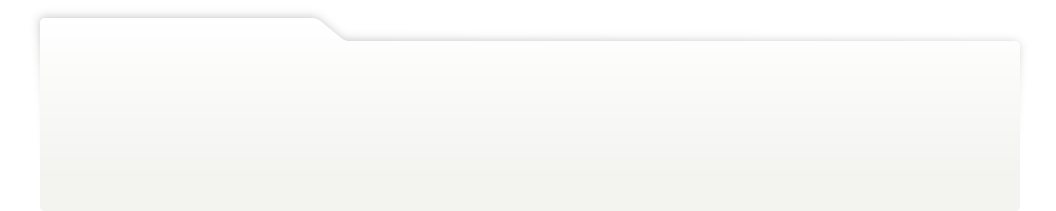
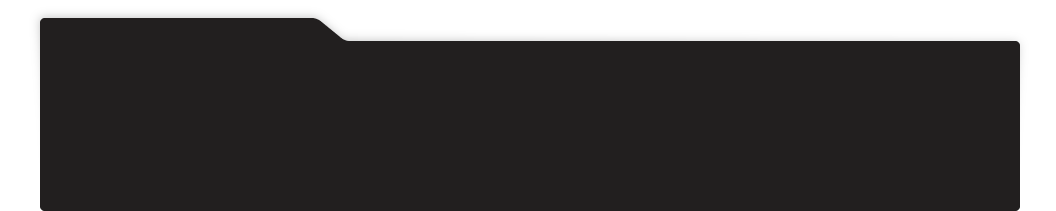
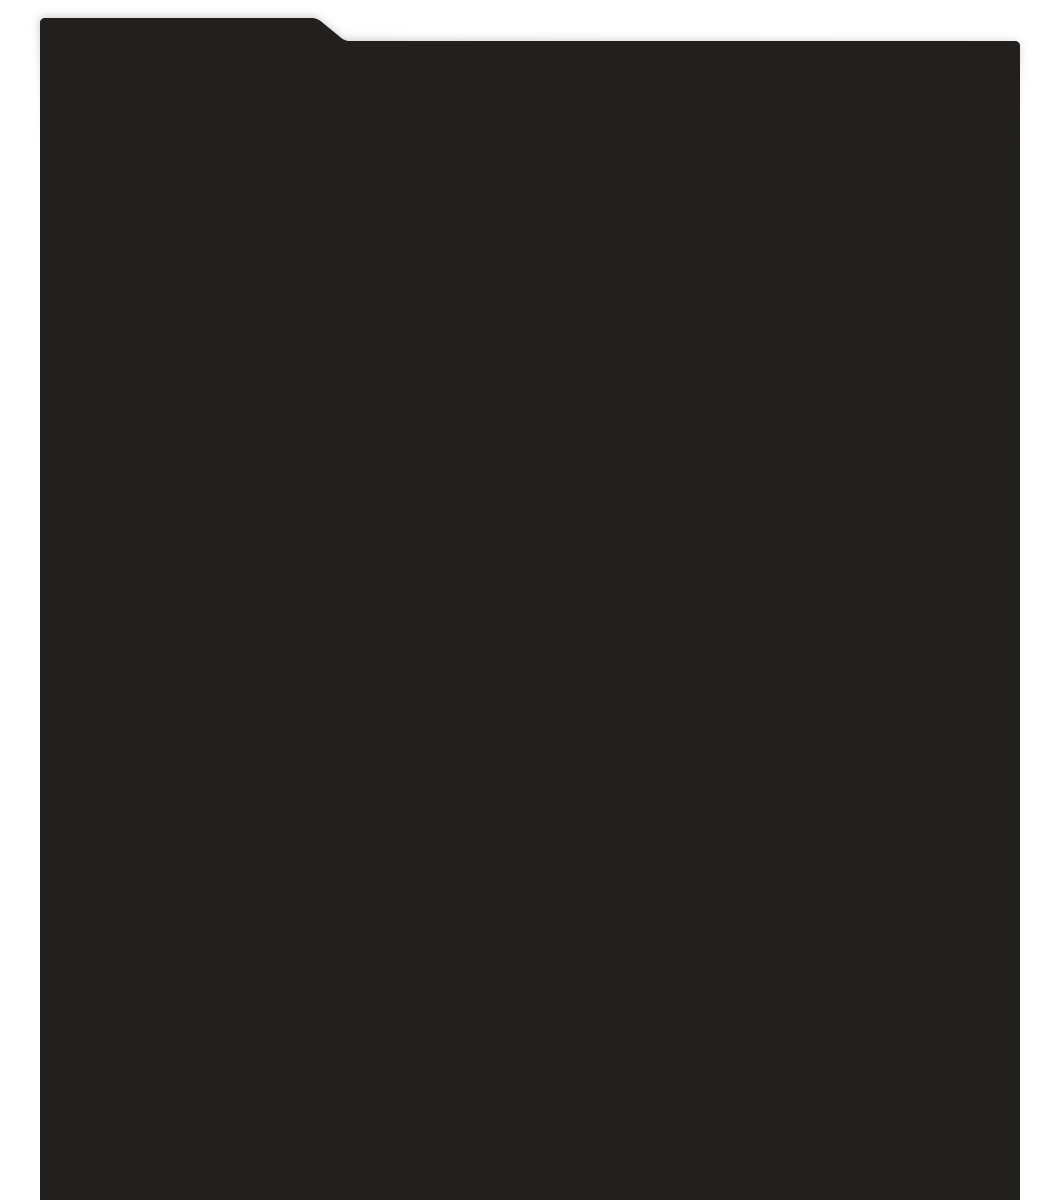
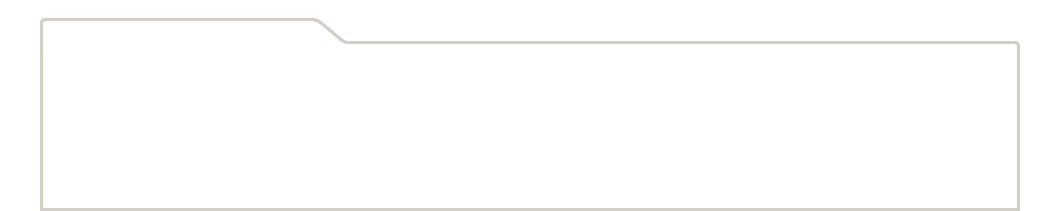
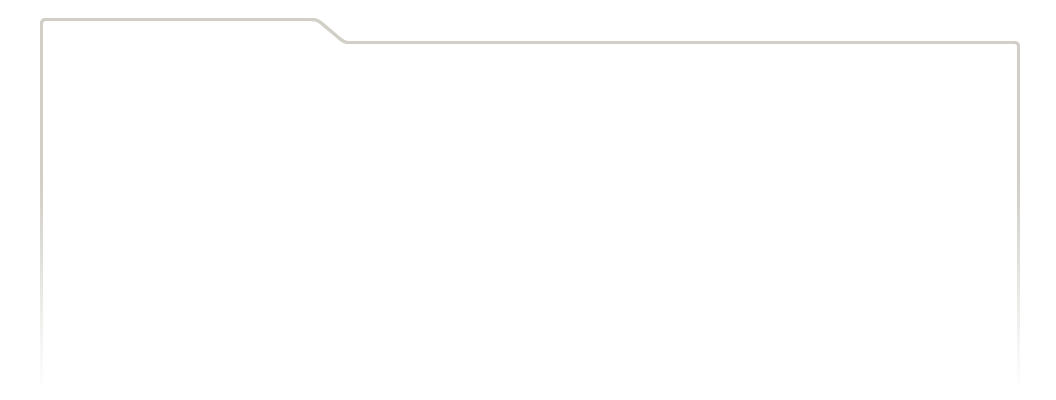
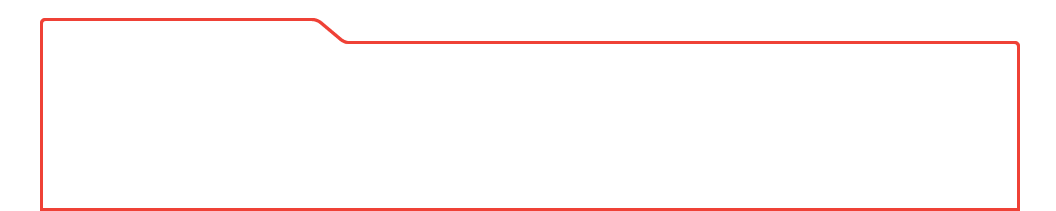
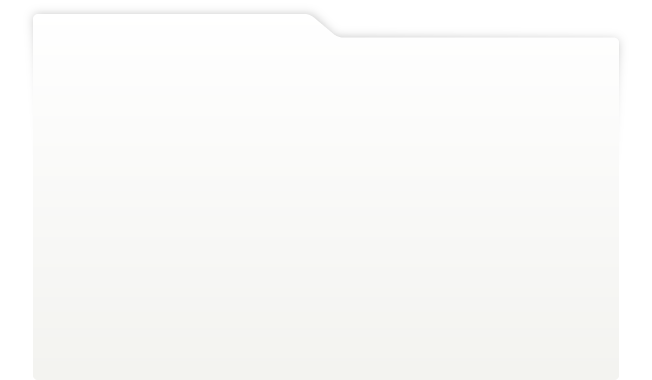
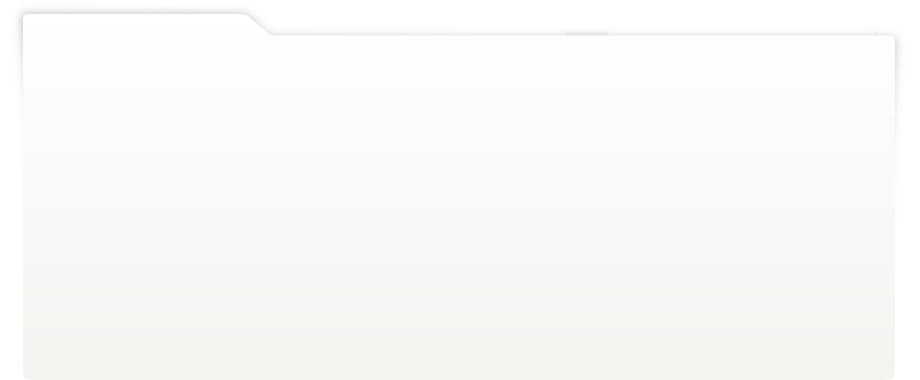
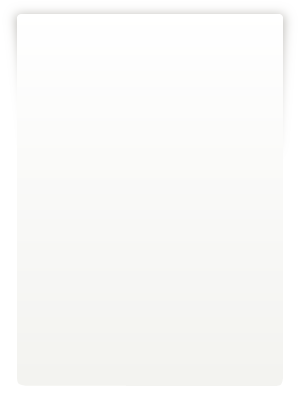
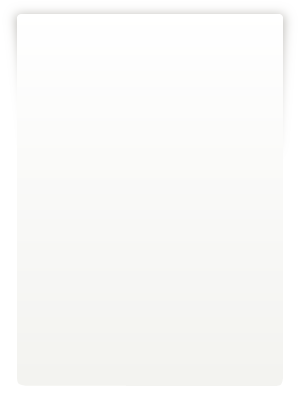
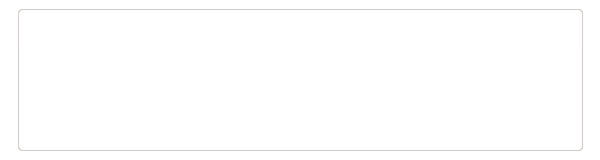
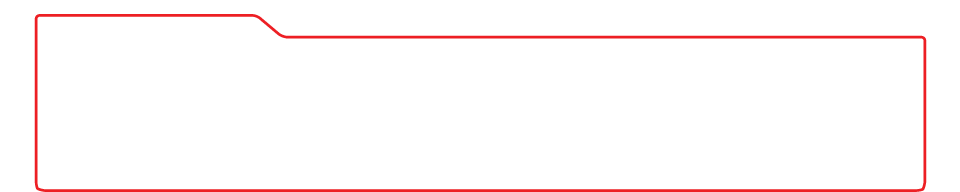
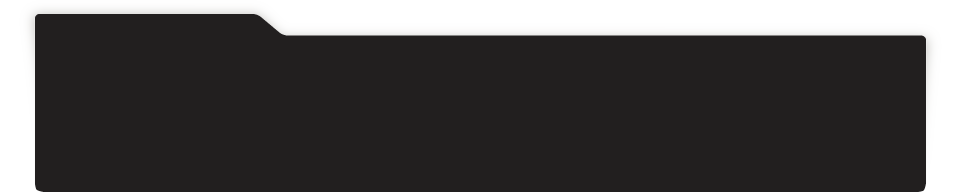
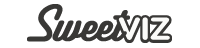
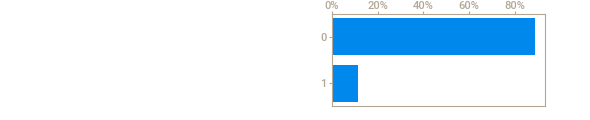
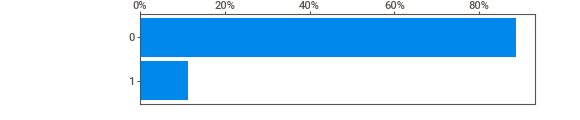
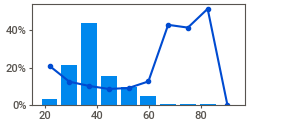
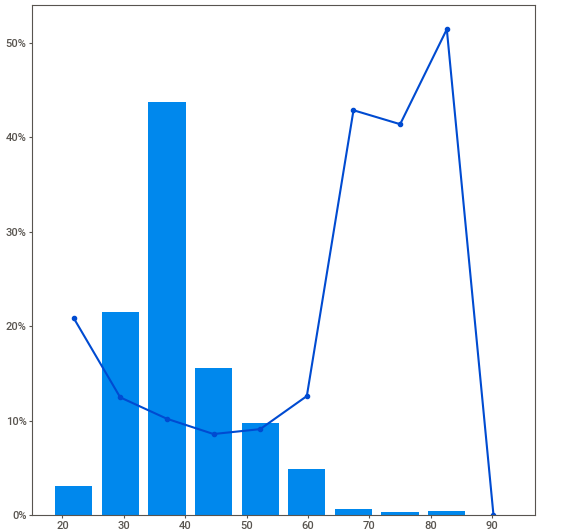
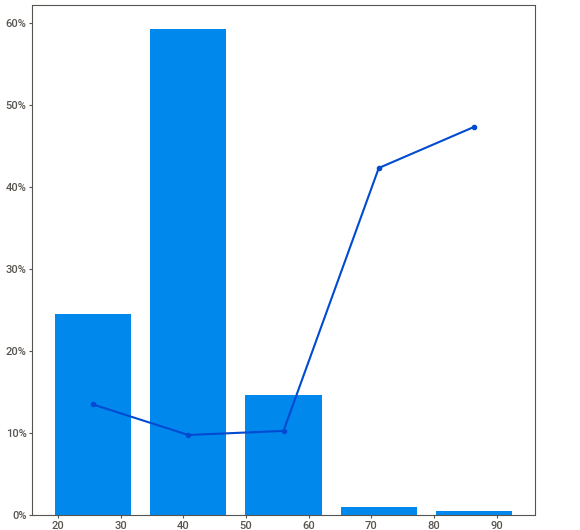
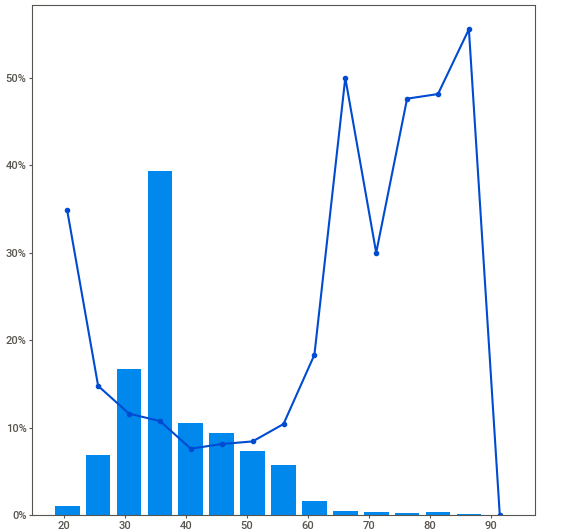
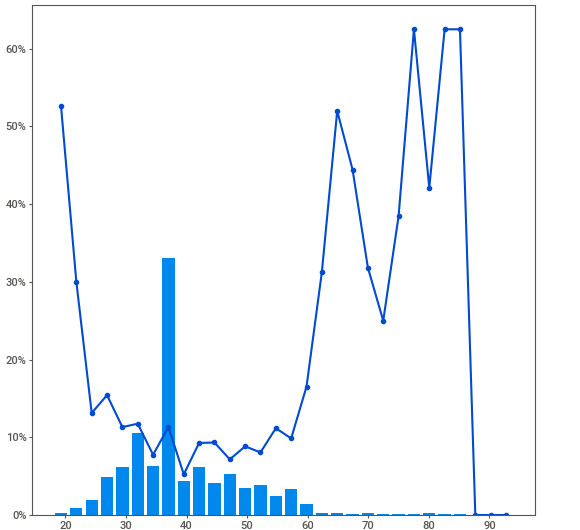
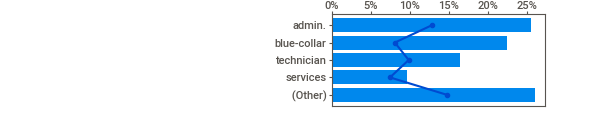
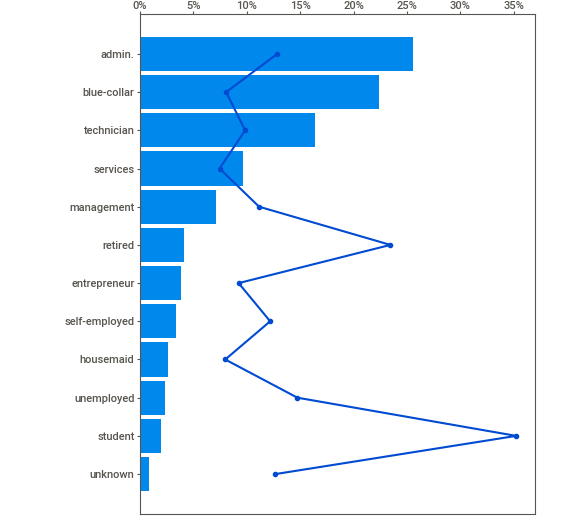
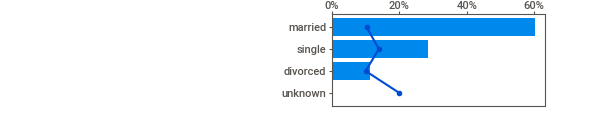
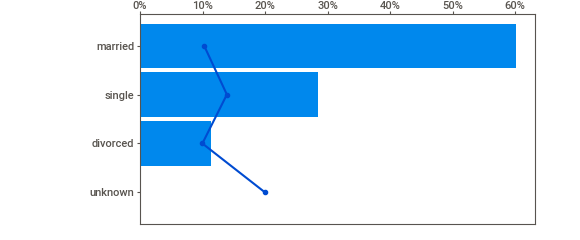
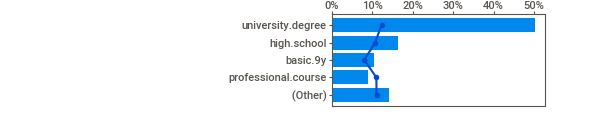
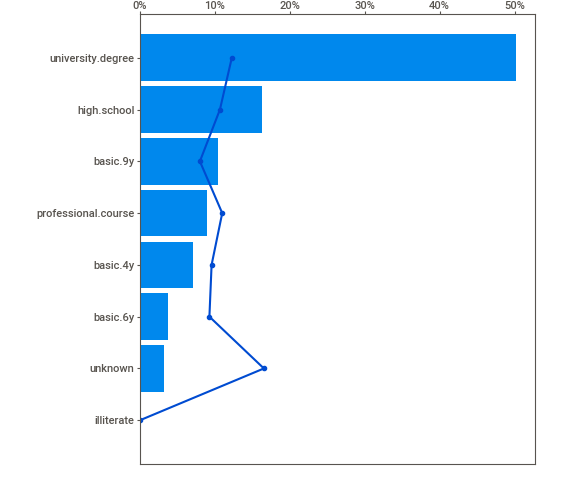
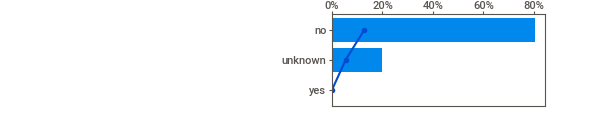
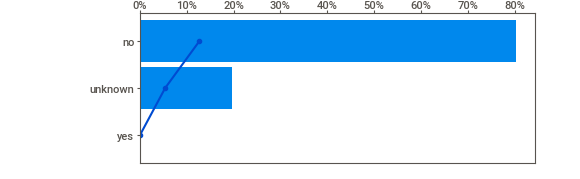
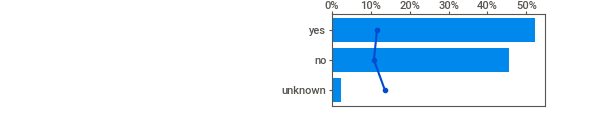
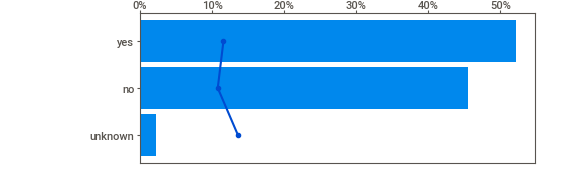
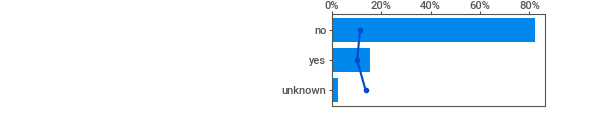
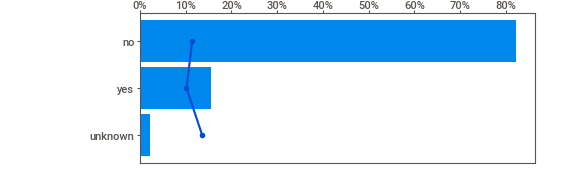
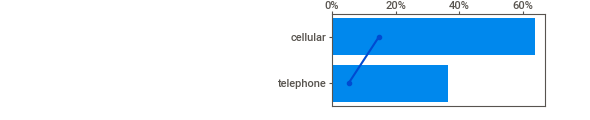
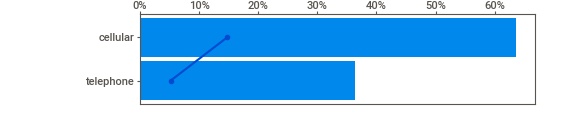
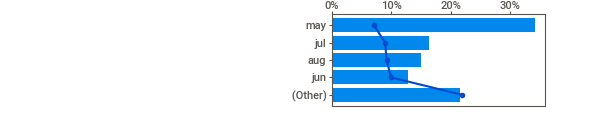
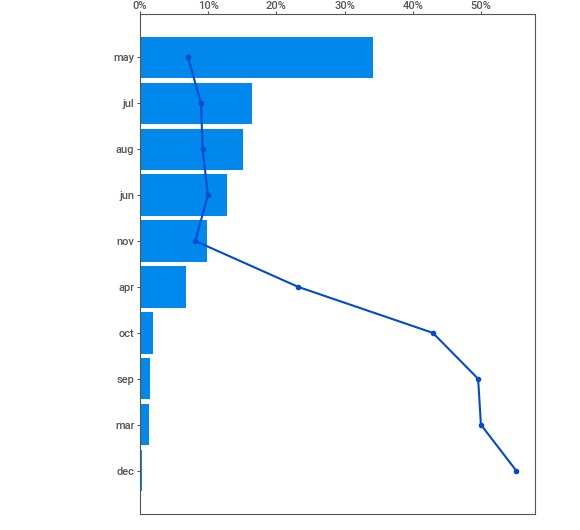
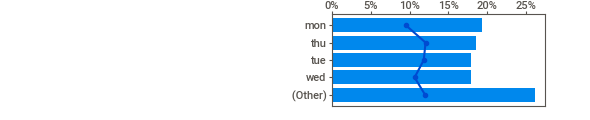
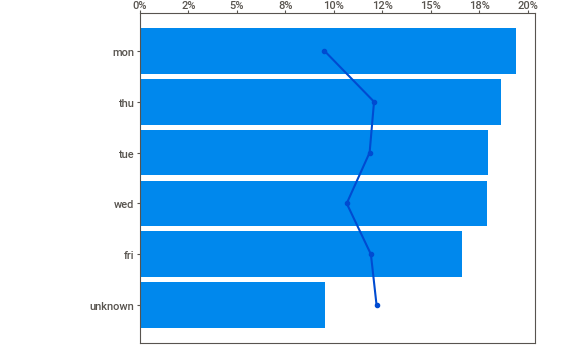
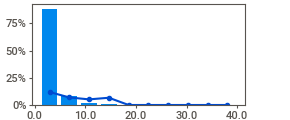
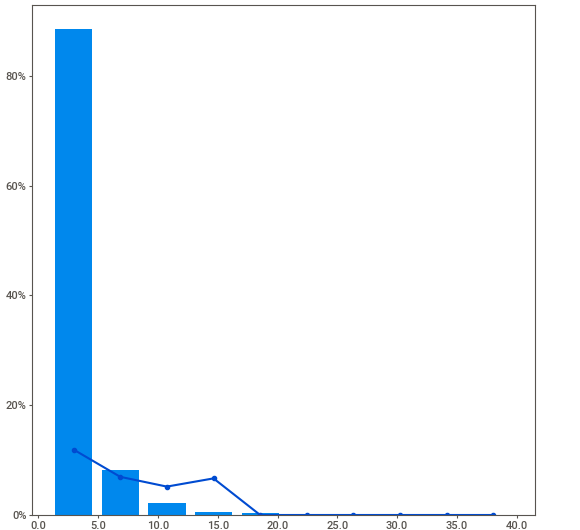
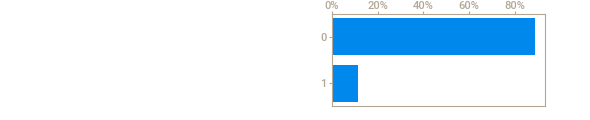
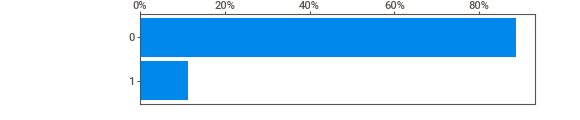
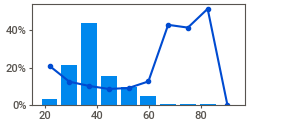
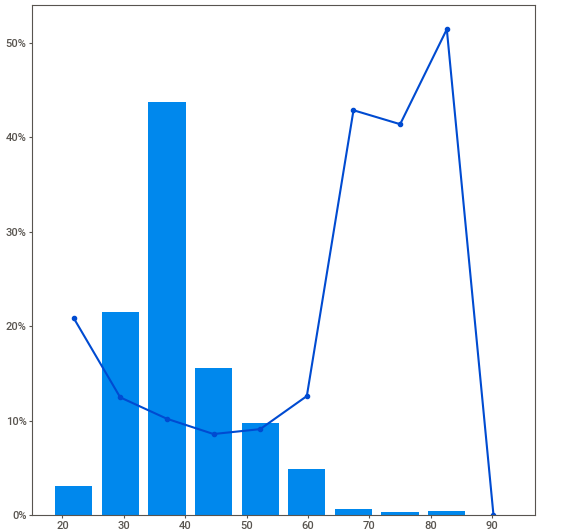
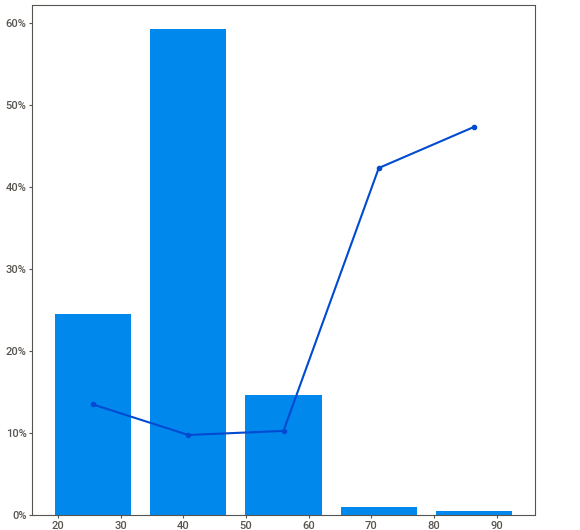
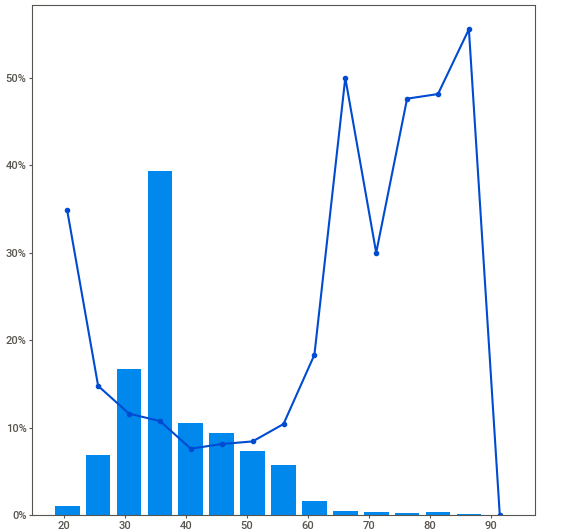
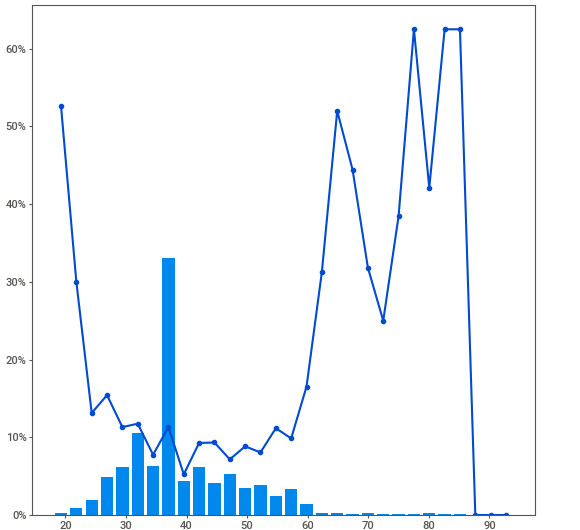
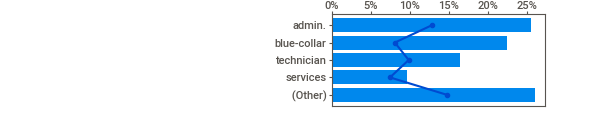
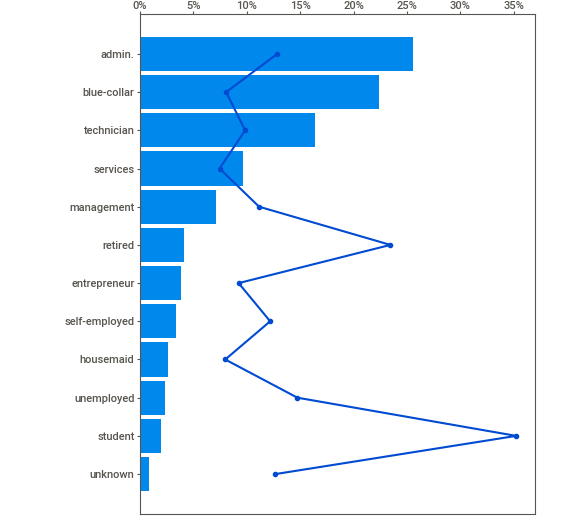
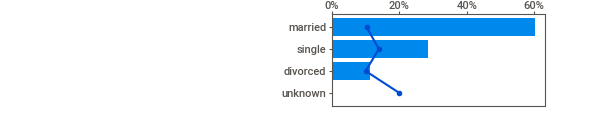
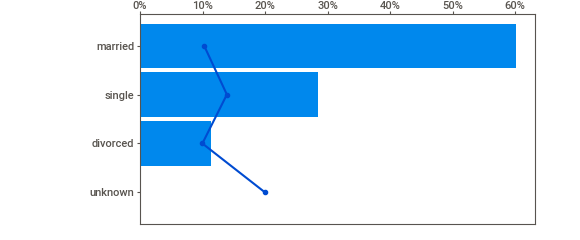
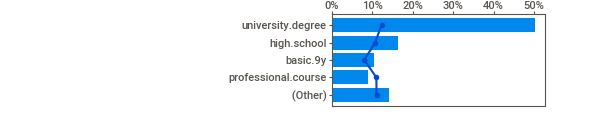
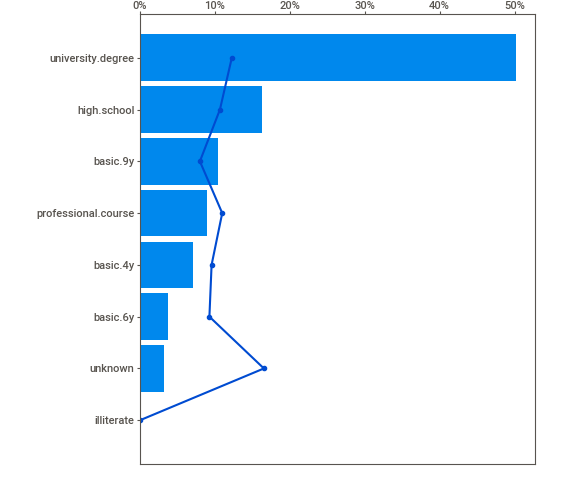
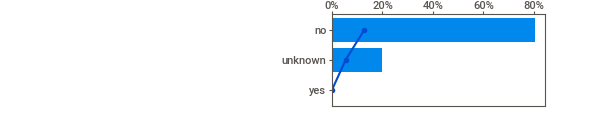
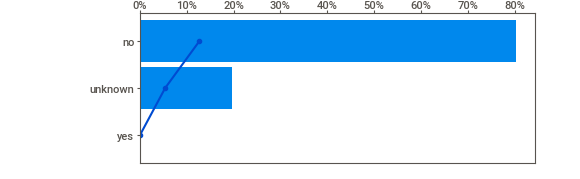
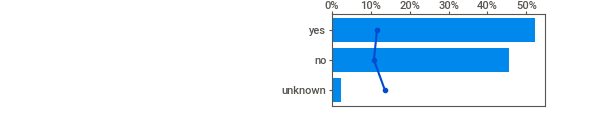
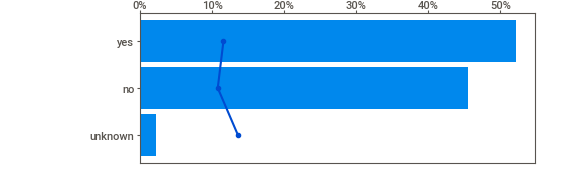
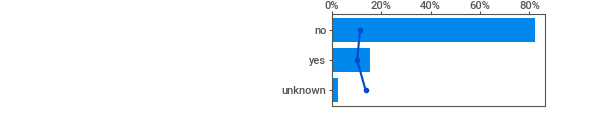
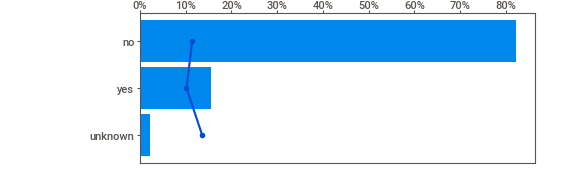
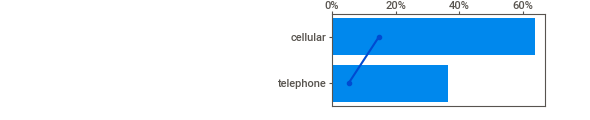
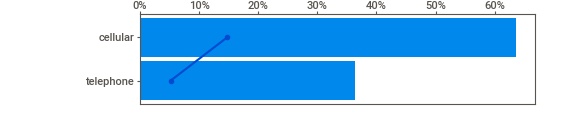
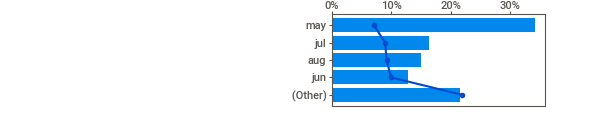
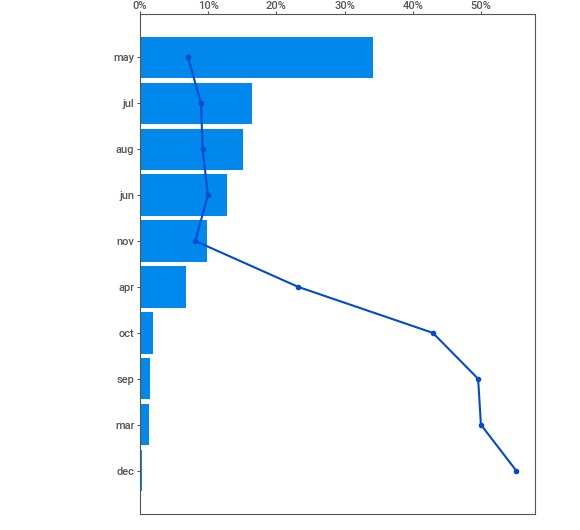
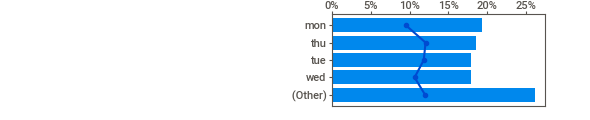
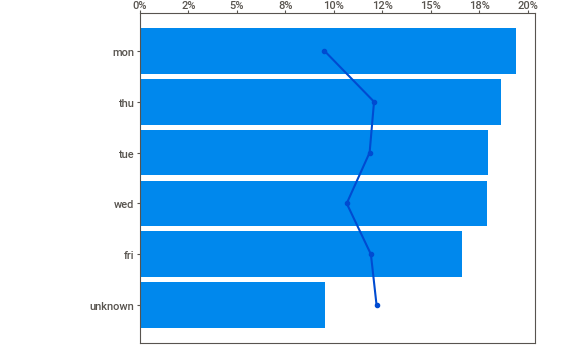
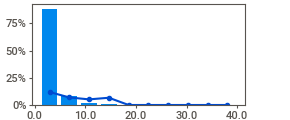
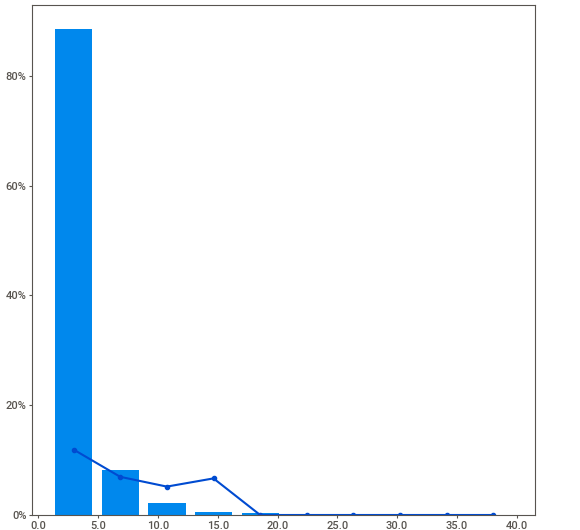
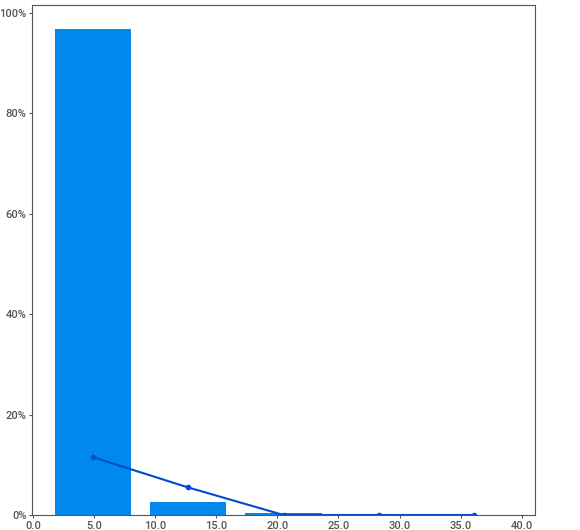
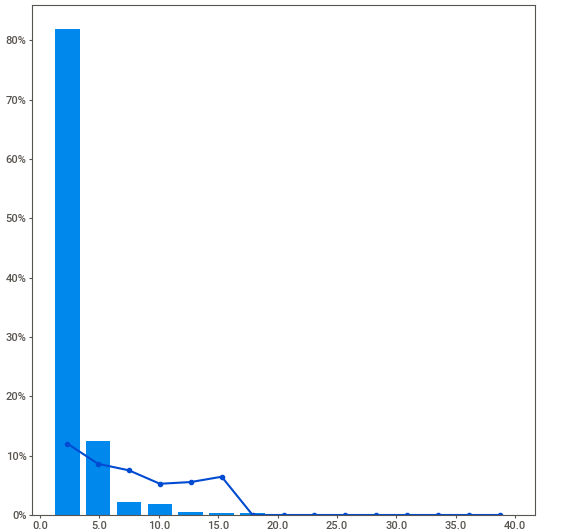
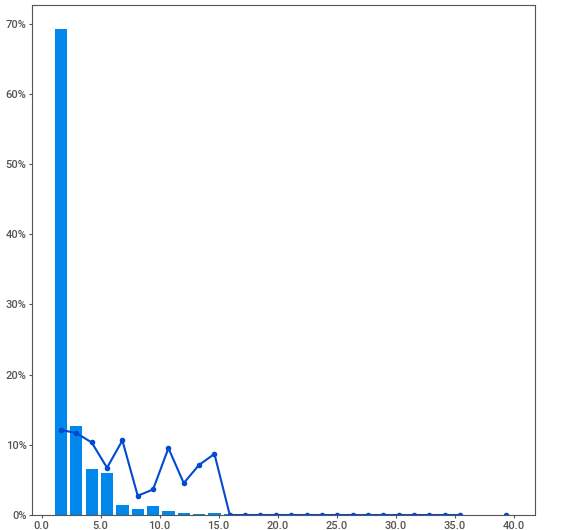
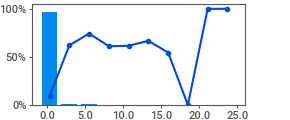
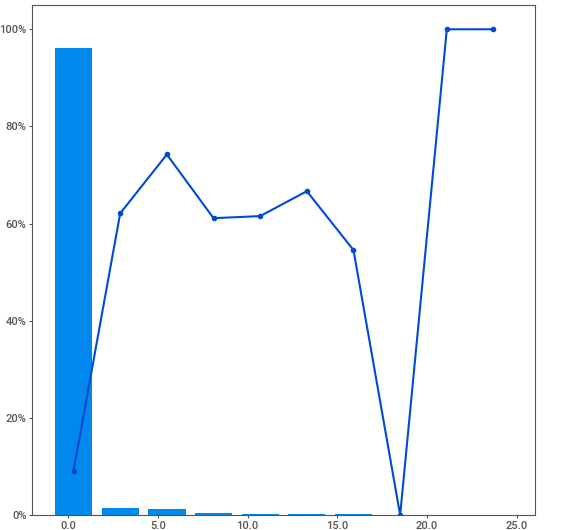
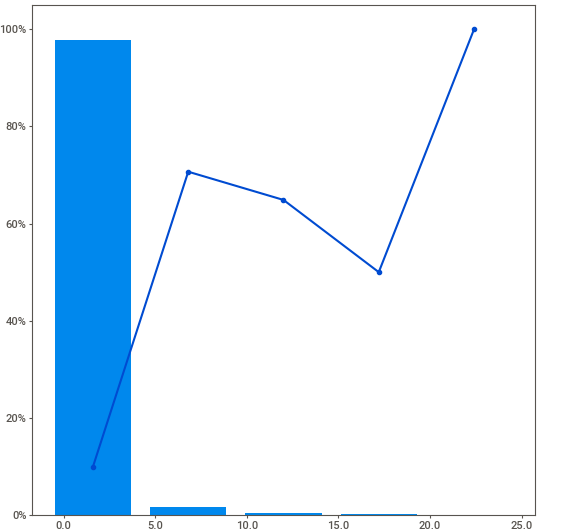
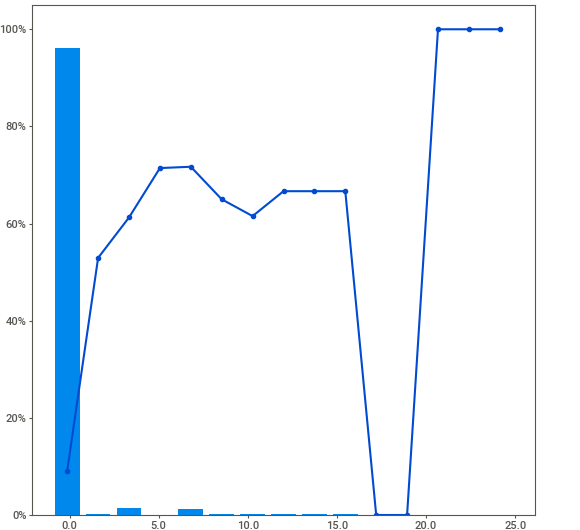
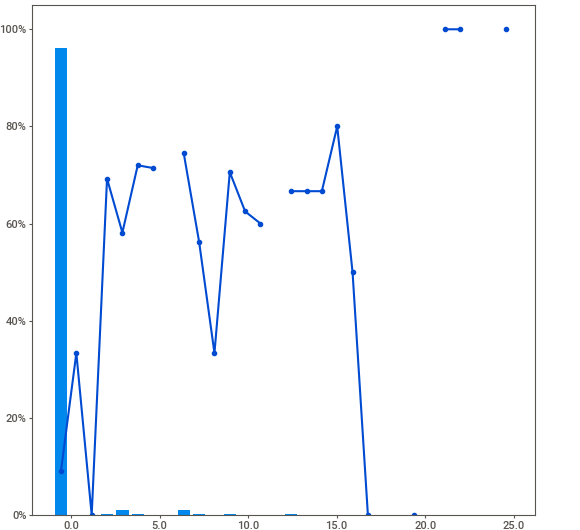
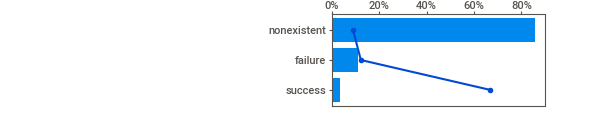
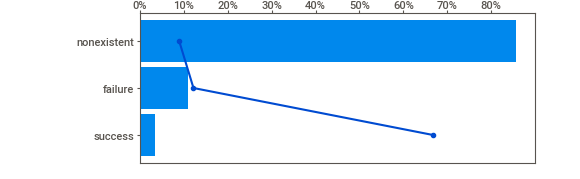
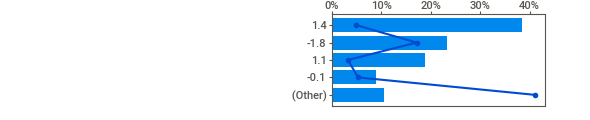
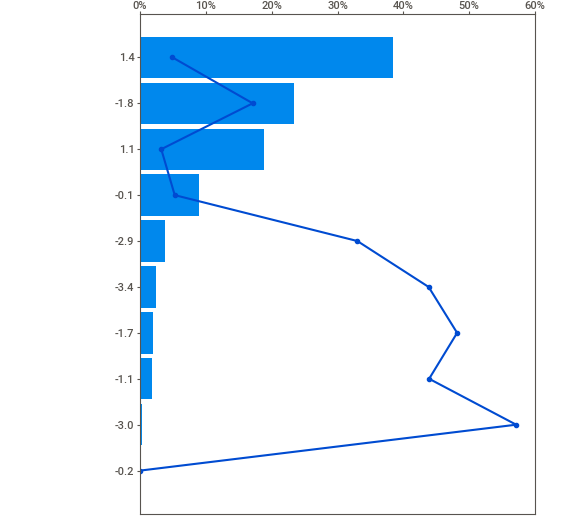
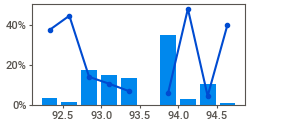
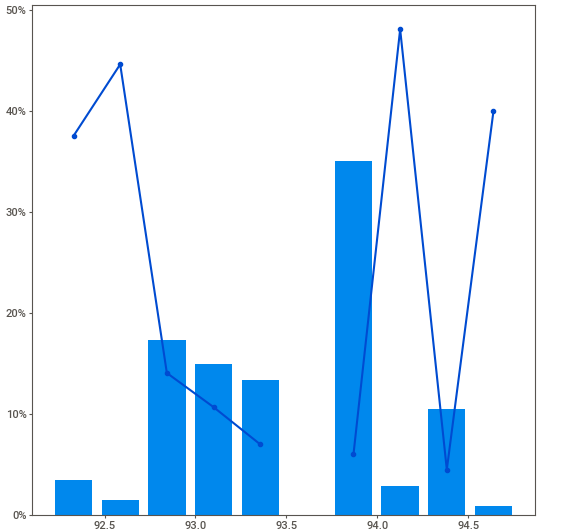
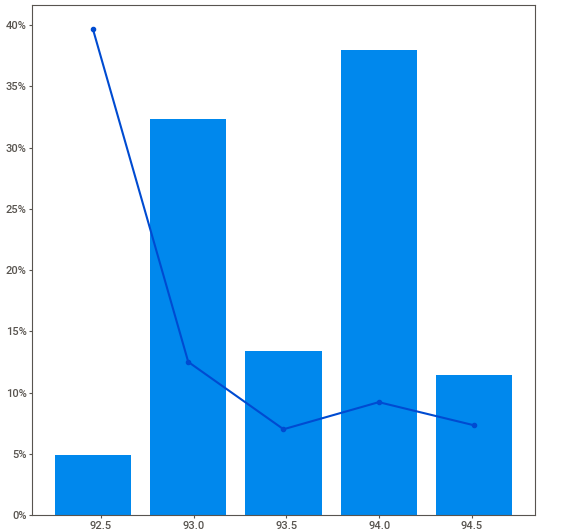
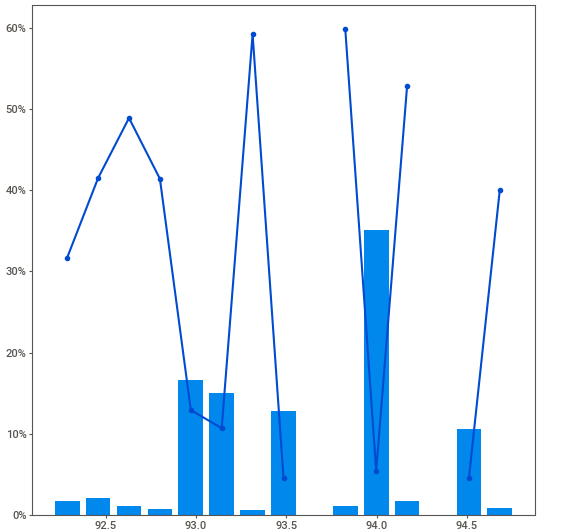
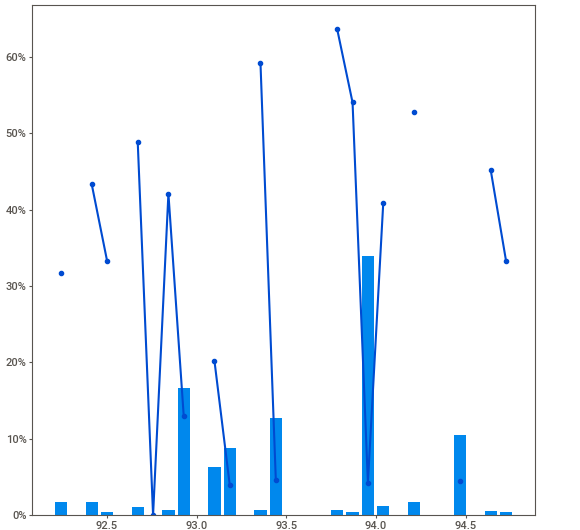
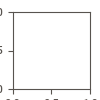

In [820]:
report.show_notebook()

In [ ]:
traindata_df5 = traindata_df.copy()
traindata_df5['responded'] = np.where(traindata_df5['responded'] == 'yes',1,0)
traindata_df = traindata_df5
traindata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         8238 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       8238 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     8238 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  poutcome        8238 non-null   object 
 13  emp.var.rate    8238 non-null   float64
 14  cons.price.idx  8238 non-null   float64
 15  cons.conf.idx   8238 non-null   float64
 16  euribor3m       8238 non-null   float64
 17  nr.employed     8238 non-null   f

Text(0.5, 1.0, 'Correlation Heatmap')

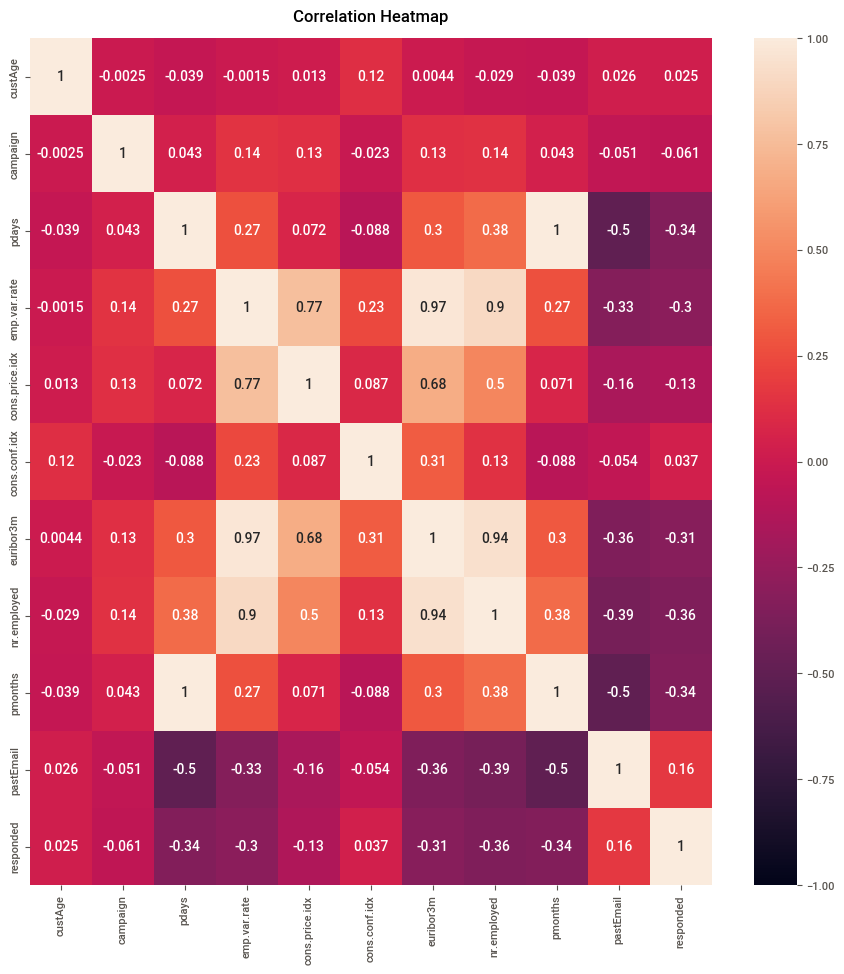

In [411]:
train_filter = traindata_df[['custAge','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx',
                             'euribor3m','nr.employed','pmonths','pastEmail','responded']]
plt.figure(figsize = (11, 11))
heatmap = sns.heatmap(train_filter.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

In [412]:
# based on sweetviz, pdays and pmonths have no big impact on responded. 
# Hence, we are creating new features. If 999, then we assign 0 and for others we assign 1 to indicate 
# 'called before' or not. From above corr matrix, we see corr of pdays and pmonths is 1. so dropping pmonths 
#traindata_df6 = traindata_df.copy()
#traindata_df6['calledbefore'] = np.where(traindata_df6['pdays'] == "999", -1, traindata_df6['pdays'])
#traindata_df6 = traindata_df6.drop(['pmonths'])
#traindata_df = traindata_df6
traindata_df = traindata_df.drop(['pmonths'], axis = 1)
traindata_df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail', 'responded'],
      dtype='object')

In [413]:
traindata_df['pdays'] = traindata_df['pdays'].apply(lambda x: -1 if x == 999 else x)
traindata_df.head()


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,2.0,-1.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,0.0,0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,35.0,-1.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.0,0
2,38.0,admin.,single,high.school,no,no,no,telephone,jun,unknown,1.0,-1.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0.0,0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,2.0,-1.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.0,0
4,39.0,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,6.0,-1.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.0,0


In [414]:
report = sv.analyze(traindata_df, target_feat='responded')

                                             |      | [  0%]   00:00 -> (? left)

In [1]:
report.show_notebook()

NameError: name 'report' is not defined

In [ ]:
traindata_df7 = traindata_df.copy()
traindata_df = traindata_df7.drop(['campaign','housing','loan'], axis = 1)
traindata_df = traindata_df.drop(['month','day_of_week'], axis = 1)
traindata_df

,custAge,profession,marital,schooling,default,contact,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,responded
0,34.0,admin.,single,university.degree,no,cellular,-1.0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,0.0,0
1,31.0,services,single,high.school,no,cellular,-1.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.0,0
2,38.0,admin.,single,high.school,no,telephone,-1.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0.0,0
3,52.0,admin.,divorced,university.degree,unknown,cellular,-1.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.0,0
4,39.0,blue-collar,single,university.degree,unknown,cellular,-1.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,55.0,retired,married,high.school,no,cellular,7.0,success,-3.4,92.431,-26.9,0.722,5017.5,0.0,1
8234,41.0,admin.,divorced,high.school,no,telephone,-1.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0.0,1
8235,32.0,self-employed,single,university.degree,no,cellular,-1.0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,0.0,1
8236,38.0,housemaid,married,university.degree,no,cellular,-1.0,nonexistent,-2.9,92.963,-40.8,1.099,5076.2,0.0,1


In [417]:
schooling_enc = traindata_df['schooling'].unique()
profession_enc = traindata_df['profession'].unique()
marital_enc = traindata_df['marital'].unique()
default_enc = traindata_df['default'].unique()
contact_enc = traindata_df['contact'].unique()
poutcome_enc = traindata_df['poutcome'].unique()
categories = [profession_enc, marital_enc, schooling_enc, default_enc, contact_enc, poutcome_enc]
categories

[array(['admin.', 'services', 'blue-collar', 'entrepreneur', 'technician',
        'retired', 'housemaid', 'student', 'unknown', 'unemployed',
        'self-employed', 'management'], dtype=object),
 array(['single', 'divorced', 'married', 'unknown'], dtype=object),
 array(['university.degree', 'high.school', 'professional.course',
        'basic.4y', 'unknown', 'basic.9y', 'basic.6y', 'illiterate'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object)]

In [418]:
schooling_enc

array(['university.degree', 'high.school', 'professional.course',
       'basic.4y', 'unknown', 'basic.9y', 'basic.6y', 'illiterate'],
      dtype=object)

In [419]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, categories=categories)
        
traindata_df_categorical = traindata_df[['profession','marital','schooling','default','contact','poutcome']]
traindata_df_categorical = onehot_encoder.fit_transform(traindata_df_categorical)
traindata_df_categorical = pd.DataFrame(traindata_df_categorical, columns=onehot_encoder.get_feature_names_out())
traindata_df_categorical

,profession_admin.,profession_services,profession_blue-collar,profession_entrepreneur,profession_technician,profession_retired,profession_housemaid,profession_student,profession_unknown,profession_unemployed,...,schooling_basic.6y,schooling_illiterate,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,poutcome_nonexistent,poutcome_failure,poutcome_success
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8236,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [420]:
traindata_df=pd.concat([traindata_df,traindata_df_categorical],axis=1)
traindata_df=traindata_df.drop(['profession','marital','schooling','default','contact','poutcome'],axis=1)


In [421]:
traindata_df.columns

Index(['custAge', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail', 'responded',
       'profession_admin.', 'profession_services', 'profession_blue-collar',
       'profession_entrepreneur', 'profession_technician',
       'profession_retired', 'profession_housemaid', 'profession_student',
       'profession_unknown', 'profession_unemployed',
       'profession_self-employed', 'profession_management', 'marital_single',
       'marital_divorced', 'marital_married', 'marital_unknown',
       'schooling_university.degree', 'schooling_high.school',
       'schooling_professional.course', 'schooling_basic.4y',
       'schooling_unknown', 'schooling_basic.9y', 'schooling_basic.6y',
       'schooling_illiterate', 'default_no', 'default_unknown', 'default_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [785]:
testdata_df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pmonths', 'pastEmail'],
      dtype='object')

In [494]:
x = traindata_df.drop(['responded'],axis=1).values
y = traindata_df['responded'].values

In [496]:
x

array([[34. , -1. , -1.8, ...,  1. ,  0. ,  0. ],
       [31. , -1. ,  1.4, ...,  1. ,  0. ,  0. ],
       [38. , -1. ,  1.4, ...,  1. ,  0. ,  0. ],
       ...,
       [32. , -1. , -1.8, ...,  1. ,  0. ,  0. ],
       [38. , -1. , -2.9, ...,  1. ,  0. ,  0. ],
       [85. , -1. , -1.8, ...,  0. ,  1. ,  0. ]])

In [541]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 27, 
                                                    shuffle = True, stratify = y)

In [542]:
x_train

array([[33. , -1. ,  1.4, ...,  1. ,  0. ,  0. ],
       [38. , -1. ,  1.4, ...,  1. ,  0. ,  0. ],
       [41. , -1. ,  1.4, ...,  1. ,  0. ,  0. ],
       ...,
       [38. , -1. ,  1.1, ...,  1. ,  0. ,  0. ],
       [38. , -1. , -3.4, ...,  0. ,  1. ,  0. ],
       [49. , -1. ,  1.4, ...,  1. ,  0. ,  0. ]])

In [543]:
from sklearn.preprocessing import StandardScaler

In [544]:
SC=StandardScaler()
x_train[:,:9]= SC.fit_transform(x_train[:,:9])


In [545]:
x_test[:,:9]= SC.transform(x_test[:,:9])
x_test

array([[-0.70553653, -0.17382147,  0.66482504, ...,  1.        ,
         0.        ,  0.        ],
       [-1.56739033, -0.17382147,  0.85648125, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16687791, -0.17382147,  0.85648125, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.16687791, -0.17382147,  0.66482504, ...,  1.        ,
         0.        ,  0.        ],
       [-0.49007308, -0.17382147, -1.89059107, ...,  1.        ,
         0.        ,  0.        ],
       [-1.4596586 , -0.17382147,  0.85648125, ...,  1.        ,
         0.        ,  0.        ]])

In [546]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [547]:
from sklearn.model_selection import GridSearchCV
model = linear_model.LogisticRegression(fit_intercept = True, max_iter = 1000)
       
parameters = {'class_weight': [None, 'balanced'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
        
grid_search = GridSearchCV(model, parameters, scoring = "f1")
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [548]:
best_model = grid_search.best_estimator_
        
#best_model        
best_model.fit(x_train, y_train)
      

LogisticRegression(class_weight='balanced', max_iter=1000, solver='newton-cg')

In [549]:
y_pred=best_model.predict(x_test)
# y_pred = grid_search.predict(x_test)

In [550]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.43170320404721757

In [551]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7486687848432696

In [760]:
y_pr = best_model.predict(x_test)
accuracy_score(y_test, y_pr)

0.7942961165048543

Decision Tree

In [558]:
# Rearranging colunms to bring target column to the last
traindata_df_dt = traindata_df[['custAge', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail',
       'profession_admin.', 'profession_services', 'profession_blue-collar',
       'profession_entrepreneur', 'profession_technician',
       'profession_retired', 'profession_housemaid', 'profession_student',
       'profession_unknown', 'profession_unemployed',
       'profession_self-employed', 'profession_management', 'marital_single',
       'marital_divorced', 'marital_married', 'marital_unknown',
       'schooling_university.degree', 'schooling_high.school',
       'schooling_professional.course', 'schooling_basic.4y',
       'schooling_unknown', 'schooling_basic.9y', 'schooling_basic.6y',
       'schooling_illiterate', 'default_no', 'default_unknown', 'default_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_failure', 'poutcome_success','responded']]


,custAge,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,profession_admin.,profession_services,...,schooling_illiterate,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,poutcome_nonexistent,poutcome_failure,poutcome_success,responded
0,34.0,-1.0,-1.8,93.075,-47.1,1.498,5099.1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,31.0,-1.0,1.4,93.918,-42.7,4.968,5228.1,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,38.0,-1.0,1.4,94.465,-41.8,4.961,5228.1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
3,52.0,-1.0,1.4,93.918,-42.7,4.962,5228.1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,39.0,-1.0,1.4,93.918,-42.7,4.961,5228.1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [806]:
xdt = traindata_df_dt.drop(['responded'], axis = 1)
ydt = pd.DataFrame(traindata_df_dt['responded'])
x_train, x_test, y_train, y_test = train_test_split(xdt, ydt, test_size = 0.2, random_state = 27, shuffle = True, stratify = y)
x_train.iloc[:,:8]= SC.fit_transform(x_train.iloc[:,:8])
x_test.iloc[:,:8]= SC.fit_transform(x_test.iloc[:,:8])

In [639]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [737]:
y_train['responded']=y_train['responded'].astype("string")

In [738]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6590 entries, 804 to 3862
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   responded  6590 non-null   string
dtypes: string(1)
memory usage: 103.0 KB


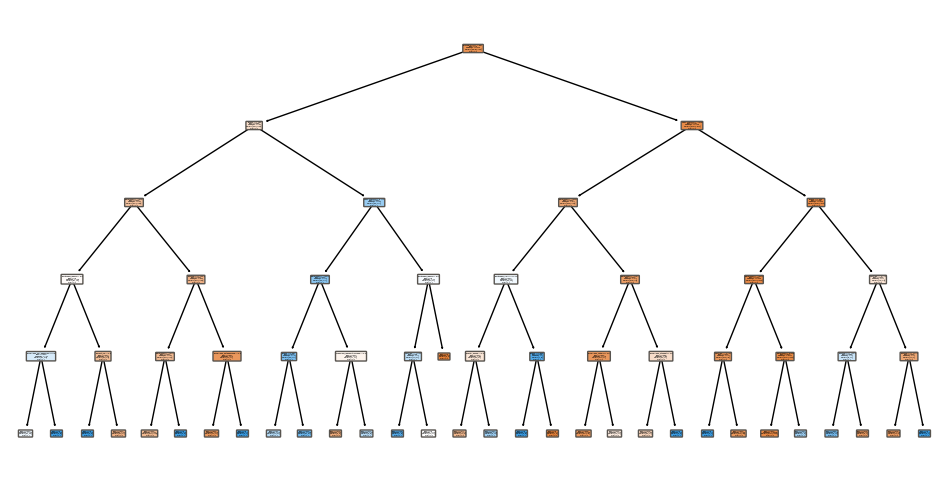

In [753]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (12,6))
plot_tree(dt, feature_names = x_train.columns,
class_names = y_train['responded'].unique(),filled = True,rounded = True); 

In [641]:
y_pred = dt.predict_proba(x_train)[:,1]
roc_auc_score(y_train,y_pred)

0.7757652534467055

In [642]:
y_pred1 = dt.predict_proba(x_test)[:,1]
roc_auc_score(y_test,y_pred1)

0.7844553050027212

In [757]:
res_pred = dt.predict(x_test)
score = accuracy_score(y_test, res_pred)
score

0.9023058252427184

Random Forest

In [758]:
f1_score(y_test,res_pred)

0.3924528301886792

In [696]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10,max_depth = 6,oob_score = True)
rf.fit(x_train,y_train)
rf.oob_score_

0.8968133535660091

In [695]:
y_pred2 = rf.predict_proba(x_train)[:,1]
roc_auc_score(y_train,y_pred2)

0.8148970920092478

In [694]:
y_pred3 = rf.predict_proba(x_test)[:,1]
roc_auc_score(y_test,y_pred3)

0.8049254960799024

In [691]:
y_predict = rf.predict(x_train)
accuracy_score(y_train, y_predict)

0.9063732928679817

In [692]:
y_predict2 = rf.predict(x_test)
accuracy_score(y_test, y_predict2)

0.9071601941747572

In [759]:
f1_score(y_test,y_predict2)

0.38554216867469876

In [693]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1462
           1       0.76      0.26      0.39       186

    accuracy                           0.91      1648
   macro avg       0.84      0.62      0.67      1648
weighted avg       0.90      0.91      0.89      1648



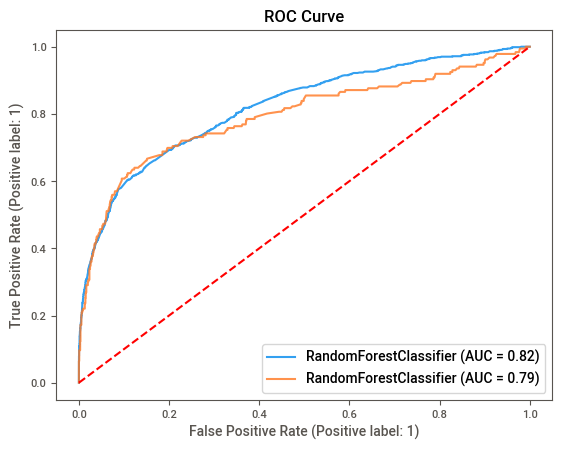

In [726]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train, ax=ax, alpha=0.8)
rfc_disp1 = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=ax, alpha=0.8)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve')
plt.show()

In [717]:
rffit = rf.fit(x_train,y_train)
imp_df = pd.DataFrame({
    "Varname": x_train.columns,
    "Imp": rffit.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,euribor3m,0.239481
4,cons.conf.idx,0.102941
2,emp.var.rate,0.096044
6,nr.employed,0.088721
1,pdays,0.085834
39,poutcome_success,0.084555
7,pastEmail,0.045748
38,poutcome_failure,0.044978
3,cons.price.idx,0.042432
0,custAge,0.040991


XGBoost

In [648]:
!pip install xgboost
import xgboost as xgb

In [658]:
train_dm = xgb.DMatrix(x_train, y_train, feature_names=list(x_train.columns))
xgb_params = {
           'eta': 0.3,
            'max_depth': 5,
            'min_child_weight': 1,
            'objective': 'binary:logistic',
            'eval_metric': 'auc',
            'seed': 1,
            'silent': 1
        }
cv_results = xgb.cv(xgb_params, train_dm, num_boost_round = 500, nfold=5, metrics={'auc'}, seed=123)
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.790057,0.004446,0.761043,0.023991
1,0.809401,0.004247,0.771927,0.021237
2,0.821034,0.008530,0.771352,0.022022
3,0.827933,0.005954,0.773076,0.019324
4,0.833436,0.006803,0.772805,0.021613
...,...,...,...,...
495,0.996463,0.000327,0.714790,0.013982
496,0.996465,0.000350,0.714723,0.013850
497,0.996484,0.000332,0.714570,0.013852
498,0.996508,0.000352,0.714541,0.013845


In [778]:
test_dm = xgb.DMatrix(x_test, y_test, feature_names=list(x_test.columns))
watchlist = [(train_dm, 'train')]
xgb_model =  xgb.train(xgb_params,train_dm,
                         num_boost_round = 100, 
                         evals = watchlist, 
                         verbose_eval = 10)
y_pred4=xgb_model.predict(test_dm)

[0]	train-auc:0.78749
[10]	train-auc:0.84581
[20]	train-auc:0.86882
[30]	train-auc:0.88060
[40]	train-auc:0.89161
[50]	train-auc:0.90238
[60]	train-auc:0.91276
[70]	train-auc:0.92100
[80]	train-auc:0.92765
[90]	train-auc:0.93407
[99]	train-auc:0.93736


In [779]:
roc_auc_score(y_test,y_pred4)

0.7679971463454098

In [780]:
y_predict2 = rf.predict(x_test)
accuracy_score(y_test, y_predict2)

0.9029126213592233

In [781]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1462
           1       0.73      0.22      0.34       186

    accuracy                           0.90      1648
   macro avg       0.82      0.61      0.64      1648
weighted avg       0.89      0.90      0.88      1648



In [808]:
x_train.columns

Index(['custAge', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail', 'profession_admin.',
       'profession_services', 'profession_blue-collar',
       'profession_entrepreneur', 'profession_technician',
       'profession_retired', 'profession_housemaid', 'profession_student',
       'profession_unknown', 'profession_unemployed',
       'profession_self-employed', 'profession_management', 'marital_single',
       'marital_divorced', 'marital_married', 'marital_unknown',
       'schooling_university.degree', 'schooling_high.school',
       'schooling_professional.course', 'schooling_basic.4y',
       'schooling_unknown', 'schooling_basic.9y', 'schooling_basic.6y',
       'schooling_illiterate', 'default_no', 'default_unknown', 'default_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [810]:
testdata_df.columns

Index(['custAge', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail', 'profession_admin.',
       'profession_services', 'profession_blue-collar', 'profession_student',
       'profession_housemaid', 'profession_self-employed',
       'profession_entrepreneur', 'profession_technician',
       'profession_management', 'profession_unemployed', 'profession_unknown',
       'profession_retired', 'marital_married', 'marital_single',
       'marital_divorced', 'marital_unknown', 'schooling_university.degree',
       'schooling_high.school', 'schooling_professional.course',
       'schooling_basic.4y', 'schooling_basic.9y', 'schooling_basic.6y',
       'schooling_unknown', 'schooling_illiterate', 'default_no',
       'default_unknown', 'default_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_success',
       'poutcome_nonexistent'],
      dtype='object')

In [788]:
traindata_df.columns

Index(['custAge', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail', 'responded',
       'profession_admin.', 'profession_services', 'profession_blue-collar',
       'profession_entrepreneur', 'profession_technician',
       'profession_retired', 'profession_housemaid', 'profession_student',
       'profession_unknown', 'profession_unemployed',
       'profession_self-employed', 'profession_management', 'marital_single',
       'marital_divorced', 'marital_married', 'marital_unknown',
       'schooling_university.degree', 'schooling_high.school',
       'schooling_professional.course', 'schooling_basic.4y',
       'schooling_unknown', 'schooling_basic.9y', 'schooling_basic.6y',
       'schooling_illiterate', 'default_no', 'default_unknown', 'default_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [790]:
testdata_df=testdata_df.drop(['housing','loan','month', 'day_of_week','campaign','pmonths'],axis=1)


In [791]:
testdata_df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'contact',
       'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail'],
      dtype='object')

In [792]:
schooling_enc1 = testdata_df['schooling'].unique()
profession_enc1 = testdata_df['profession'].unique()
marital_enc1 = testdata_df['marital'].unique()
default_enc1 = testdata_df['default'].unique()
contact_enc1 = testdata_df['contact'].unique()
poutcome_enc1 = testdata_df['poutcome'].unique()
categories1 = [profession_enc1, marital_enc1, schooling_enc1, default_enc1, contact_enc1, poutcome_enc1]
categories1

[array(['admin.', 'services', 'blue-collar', 'student', 'housemaid',
        'self-employed', 'entrepreneur', 'technician', 'management',
        'unemployed', 'unknown', 'retired'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['university.degree', 'high.school', 'professional.course',
        'basic.4y', 'basic.9y', 'basic.6y', 'unknown', 'illiterate'],
       dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object),
 array(['cellular', 'telephone'], dtype=object),
 array(['failure', 'success', 'nonexistent'], dtype=object)]

In [793]:
onehot_encoder = OneHotEncoder(sparse=False, categories=categories1)
        

testdata_df_categorical = testdata_df[['profession','marital','schooling','default','contact','poutcome']]
testdata_df_categorical = onehot_encoder.fit_transform(testdata_df_categorical)
testdata_df_categorical = pd.DataFrame(testdata_df_categorical, columns=onehot_encoder.get_feature_names_out())
testdata_df_categorical

,profession_admin.,profession_services,profession_blue-collar,profession_student,profession_housemaid,profession_self-employed,profession_entrepreneur,profession_technician,profession_management,profession_unemployed,...,schooling_unknown,schooling_illiterate,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_success,poutcome_nonexistent
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32947,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32948,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [794]:
testdata_df=pd.concat([testdata_df,testdata_df_categorical],axis=1)
testdata_df=testdata_df.drop(['profession','marital','schooling','default','contact','poutcome'],axis=1)


In [795]:
testdata_df.columns

Index(['custAge', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail', 'profession_admin.',
       'profession_services', 'profession_blue-collar', 'profession_student',
       'profession_housemaid', 'profession_self-employed',
       'profession_entrepreneur', 'profession_technician',
       'profession_management', 'profession_unemployed', 'profession_unknown',
       'profession_retired', 'marital_married', 'marital_single',
       'marital_divorced', 'marital_unknown', 'schooling_university.degree',
       'schooling_high.school', 'schooling_professional.course',
       'schooling_basic.4y', 'schooling_basic.9y', 'schooling_basic.6y',
       'schooling_unknown', 'schooling_illiterate', 'default_no',
       'default_unknown', 'default_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_success',
       'poutcome_nonexistent'],
      dtype='object')

In [801]:
testdata_df

,custAge,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,profession_admin.,profession_services,...,schooling_unknown,schooling_illiterate,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_success,poutcome_nonexistent
0,38.0,999,-1.1,94.199,-37.5,0.886,4963.6,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,35.0,3,-3.4,92.379,-29.8,0.788,5017.5,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,50.0,999,-1.8,92.893,-46.2,1.327,5099.1,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,30.0,999,1.4,93.444,-36.1,4.964,5228.1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,39.0,999,-0.1,93.200,-42.0,4.153,5195.8,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,38.0,999,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32946,32.0,999,-1.8,92.893,-46.2,1.266,5099.1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32947,32.0,999,-1.8,92.893,-46.2,1.299,5099.1,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
32948,32.0,999,1.4,94.465,-41.8,4.959,5228.1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [813]:
testdata_df= testdata_df[['custAge', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pastEmail', 'profession_admin.',
       'profession_services', 'profession_blue-collar',
       'profession_entrepreneur', 'profession_technician',
       'profession_retired', 'profession_housemaid', 'profession_student',
       'profession_unknown', 'profession_unemployed',
       'profession_self-employed', 'profession_management', 'marital_single',
       'marital_divorced', 'marital_married', 'marital_unknown',
       'schooling_university.degree', 'schooling_high.school',
       'schooling_professional.course', 'schooling_basic.4y',
       'schooling_unknown', 'schooling_basic.9y', 'schooling_basic.6y',
       'schooling_illiterate', 'default_no', 'default_unknown', 'default_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_nonexistent',
       'poutcome_failure', 'poutcome_success']]
testdata_df

,custAge,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,profession_admin.,profession_services,...,schooling_basic.6y,schooling_illiterate,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,poutcome_nonexistent,poutcome_failure,poutcome_success
0,38.0,999,-1.1,94.199,-37.5,0.886,4963.6,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,35.0,3,-3.4,92.379,-29.8,0.788,5017.5,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,50.0,999,-1.8,92.893,-46.2,1.327,5099.1,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,30.0,999,1.4,93.444,-36.1,4.964,5228.1,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,39.0,999,-0.1,93.200,-42.0,4.153,5195.8,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,38.0,999,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
32946,32.0,999,-1.8,92.893,-46.2,1.266,5099.1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
32947,32.0,999,-1.8,92.893,-46.2,1.299,5099.1,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
32948,32.0,999,1.4,94.465,-41.8,4.959,5228.1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [814]:
rffit = rf.fit(x_train,y_train)
testdata_df['propensity'] = rf.predict_proba(testdata_df)[:,1]
print(testdata_df.head())

   custAge  pdays  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     38.0    999          -1.1          94.199          -37.5      0.886   
1     35.0      3          -3.4          92.379          -29.8      0.788   
2     50.0    999          -1.8          92.893          -46.2      1.327   
3     30.0    999           1.4          93.444          -36.1      4.964   
4     39.0    999          -0.1          93.200          -42.0      4.153   

   nr.employed  pastEmail  profession_admin.  profession_services  ...  \
0       4963.6          2                1.0                  0.0  ...   
1       5017.5          2                0.0                  1.0  ...   
2       5099.1          2                0.0                  0.0  ...   
3       5228.1          0                1.0                  0.0  ...   
4       5195.8          0                0.0                  1.0  ...   

   schooling_illiterate  default_no  default_unknown  default_yes  \
0                   0.0

In [818]:
testdata_df1 = testdata_df.copy()
testdata_df1['propensity'] = np.where(testdata_df1['propensity'] >= 0.5,1,0)
testdata_df1

,custAge,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,profession_admin.,profession_services,...,schooling_illiterate,default_no,default_unknown,default_yes,contact_cellular,contact_telephone,poutcome_nonexistent,poutcome_failure,poutcome_success,propensity
0,38.0,999,-1.1,94.199,-37.5,0.886,4963.6,2,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,35.0,3,-3.4,92.379,-29.8,0.788,5017.5,2,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,50.0,999,-1.8,92.893,-46.2,1.327,5099.1,2,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,30.0,999,1.4,93.444,-36.1,4.964,5228.1,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
4,39.0,999,-0.1,93.200,-42.0,4.153,5195.8,0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,38.0,999,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
32946,32.0,999,-1.8,92.893,-46.2,1.266,5099.1,0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
32947,32.0,999,-1.8,92.893,-46.2,1.299,5099.1,0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
32948,32.0,999,1.4,94.465,-41.8,4.959,5228.1,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [819]:
testdata_df1.to_csv("testingCandidate.csv")

In [4]:
train_ts = pd.read_excel('train.xlsx')
train_ts

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,32.0,self-employed,single,university.degree,no,no,no,cellular,apr,thu,...,-1.8,93.075,-47.1,1.435,5099.1,999.0,0.0,yes,208.000000,8236.0
8236,NaN,housemaid,married,university.degree,no,no,no,cellular,jun,tue,...,-2.9,92.963,-40.8,1.099,5076.2,999.0,0.0,yes,129.000000,8237.0
8237,85.0,housemaid,married,NaN,unknown,yes,no,cellular,apr,tue,...,-1.8,93.749,-34.6,0.642,5008.7,999.0,1.0,yes,33.000000,8238.0
8238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.112069,NaN


In [91]:
import calendar
train_ts2 = train_ts.copy()
d = {'jan': '01','feb': '02','mar': '03','apr': '04','may': '05','jun': '06','jul': '07','aug': '08','sep': '09', 'oct': 10,'nov': 11,'dec': 12}
train_ts2['month'] = train_ts2['month'].map(d)
train_ts2['month'] = train_ts2['month'].astype(str).apply(lambda x: x.replace('.0',''))
# train_ts2['month'] = train_ts2['month'].astype(str, errors='ignore')
# train_ts2 = train_ts2.drop(['dt'], axis = 1)
train_ts2['year'] = 2023
train_ts2['date'] = str('01')
# train_ts1['dt'] = train_ts[['year', 'monthnum', 'date']].agg('-'.join, axis=1)
train_ts2['month']
# train_ts2['year']
train_ts2['date_field'] = train_ts2[['year', 'month', 'date']].astype(str).apply(lambda x: '-'.join(x), axis=1)
train_ts2['date_field'] = pd.to_datetime(train_ts2['date_field'])
train_ts2

ParserError: Unknown string format: 2023-nan-01 present at position 10

In [92]:
train_ts2 = train_ts2.drop(index = train_ts2.index[-2:]) 
train_ts2['date_field'] = pd.to_datetime(train_ts2['date_field'])
train_ts2

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pmonths,pastEmail,responded,profit,id,monthnum,year,date,dt,date_field
0,34.0,admin.,single,university.degree,no,no,yes,cellular,04,wed,...,999.000000,0.0,no,NaN,1.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-04-01
1,31.0,services,single,high.school,no,no,no,cellular,07,thu,...,999.000000,0.0,no,NaN,2.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-07-01
2,NaN,admin.,single,high.school,no,no,no,telephone,06,NaN,...,999.000000,0.0,no,NaN,3.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-06-01
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,07,tue,...,999.000000,0.0,no,NaN,4.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-07-01
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,07,tue,...,999.000000,0.0,no,NaN,5.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8233,55.0,retired,married,high.school,no,yes,no,cellular,10,thu,...,0.233333,0.0,yes,203.0,8234.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-10-01
8234,41.0,admin.,divorced,high.school,no,no,no,telephone,06,mon,...,999.000000,0.0,yes,188.0,8235.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-06-01
8235,32.0,self-employed,single,university.degree,no,no,no,cellular,04,thu,...,999.000000,0.0,yes,208.0,8236.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-04-01
8236,NaN,housemaid,married,university.degree,no,no,no,cellular,06,tue,...,999.000000,0.0,yes,129.0,8237.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...,2023-06-01


In [93]:
train_ts2.set_index(['date_field'],inplace=True)

In [94]:
train_ts2

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,nr.employed,pmonths,pastEmail,responded,profit,id,monthnum,year,date,dt
date_field,,,,,,,,,,,,,,,,,,,,,
2023-04-01,34.0,admin.,single,university.degree,no,no,yes,cellular,04,wed,...,5099.1,999.000000,0.0,no,NaN,1.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
2023-07-01,31.0,services,single,high.school,no,no,no,cellular,07,thu,...,5228.1,999.000000,0.0,no,NaN,2.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
2023-06-01,NaN,admin.,single,high.school,no,no,no,telephone,06,NaN,...,5228.1,999.000000,0.0,no,NaN,3.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
2023-07-01,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,07,tue,...,5228.1,999.000000,0.0,no,NaN,4.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
2023-07-01,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,07,tue,...,5228.1,999.000000,0.0,no,NaN,5.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,55.0,retired,married,high.school,no,yes,no,cellular,10,thu,...,5017.5,0.233333,0.0,yes,203.0,8234.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
2023-06-01,41.0,admin.,divorced,high.school,no,no,no,telephone,06,mon,...,5228.1,999.000000,0.0,yes,188.0,8235.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
2023-04-01,32.0,self-employed,single,university.degree,no,no,no,cellular,04,thu,...,5099.1,999.000000,0.0,yes,208.0,8236.0,0 0 0 4.01 7.02 ...,2023,01,2023-0 0 4.01 7.02 6.0...
